In [ ]:
import numpy as np 

import pickle

import pandas as pd


import multicam

from tqdm import tqdm


In [ ]:
tng_snapshot_dir = "../../data/processed/tng/TNG300-1/"  # everything is a host halo
trees_file = "../../data/processed/tng/TNG300-1_cut_trees.p"
present_snapfile = tng_snapshot_dir + "TNG300-1_HaloHistory_MBP_snap99.hdf5"
metadata_file = "../../data/processed/tng/tng300-1-table.csv"


## TNG explore file

In [ ]:
# explore one tng file
import h5py
import numpy as np
one_file = tng_snapshot_dir + "TNG300-1_HaloHistory_MBP_snap99.hdf5" # everything is a host halo
f = h5py.File(one_file, 'r')


In [ ]:
list(f.keys())


['Halos']

In [ ]:
f['Halos'].keys()


<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items', 'block1_values', 'block2_items', 'block2_values']>

In [ ]:
ds = f['Halos']['axis0']
ds[:].shape, ds[:]


((210,),
 array([b'HaloID', b'SubhaloID', b'SubhaloID_DMO', b'SubhaloID_LastDesc',
        b'Central', b'Main', b'Mvir_TNG', b'Rvir_TNG', b'pos_x', b'pos_y',
        b'pos_z', b'vel_x', b'vel_y', b'vel_z', b'delta_2cMpc',
        b'delta_5cMpc', b'delta_10cMpc', b'delta_20cMpc', b'delta_40cMpc',
        b'cvir_init', b'cvir_init_err', b'rho_s_init', b'rho_s_init_err',
        b'Bound_Nfrac', b'Bound_Mfrac', b'Bound_Nfrac_SUBFIND', b'Rvir',
        b'Mvir', b'R200c', b'M200c', b'R500c', b'M500c', b'R2500c',
        b'M2500c', b'Core_vel_x', b'Core_vel_y', b'Core_vel_z', b'Ngas',
        b'Nstars', b'Nbhs', b'Mgas_vir', b'Zgas_vir', b'SFR_vir', b'Y_vir',
        b'Tm_vir', b'K_vir', b'Mgas_200c', b'Zgas_200c', b'SFR_200c',
        b'Y_200c', b'Tm_200c', b'K_200c', b'Mgas_500c', b'Zgas_500c',
        b'SFR_500c', b'Y_500c', b'Tm_500c', b'K_500c', b'Mgas_2500c',
        b'Zgas_2500c', b'SFR_2500c', b'Y_2500c', b'Tm_2500c', b'K_2500c',
        b'Mgas_10pkpc', b'Zgas_10pkpc', b'SFR_10pkpc', 

In [ ]:
ds = f['Halos']['axis1']
ds[:]


array([    0,     1,     2, ..., 13640, 13641, 13642])

In [ ]:
ds = f['Halos']['block0_values']
ds[:].shape


(13643, 205)

In [ ]:
ds = f['Halos']['block1_items']
ds[:]


array([b'HaloID', b'SubhaloID', b'SubhaloID_DMO', b'SubhaloID_LastDesc'],
      dtype='|S18')

In [ ]:
ds = f['Halos']['block1_values']
ds[:].shape


(13643, 4)

In [ ]:
ds = f['Halos']['block2_items']
ds[:]


array([b'EndState'], dtype='|S8')

In [ ]:
ds = f['Halos']['block2_values']
ds[:].shape


(1,)

### Extract relevant quantities

In [ ]:
data = {}


In [ ]:
# from 'block1' we just neeed halo_id
names = ['halo_id', 'subhalo_id']
keys = [b'HaloID', b'SubhaloID']
for name, key in zip(names, keys):
    idx = np.where(f['Halos']['block1_items'][:] == key)[0].item()
    data[name] = f['Halos']['block1_values'][:,idx]

# halo_id = f['Halos']['block1_values'][:,0]
# mvir = f['Halos']['block0_values'][:,1]


In [ ]:
# from 'block0' we need mvir
names = ['mvir', 'm200', 'rvir', 'r200', 'm500', 'r500']
keys = [b'Mvir', b'M200c', b'Rvir', b'R200c', b'M500c', b'R500c']
for name, key in zip(names, keys):
    idx = np.where(f['Halos']['block0_items'][:] == key)[0].item()
    data[name] = f['Halos']['block0_values'][:,idx]


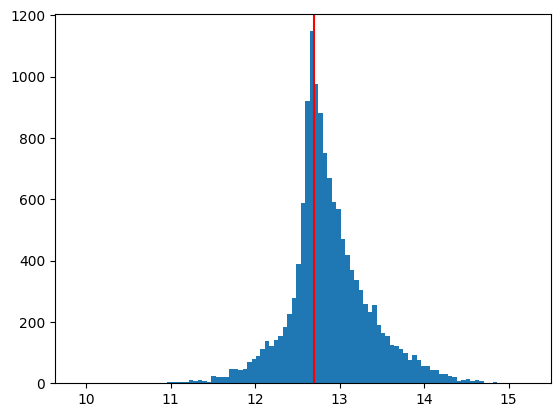

In [ ]:
_, bins, _ = plt.hist(data['mvir'], bins=101); 
# plt.hist(data['m200'], bins=bins)
plt.axvline(12.7, c='r')
